# Interpolasi

Indonesia menyelenggarakan sensus penduduk setiap 10 tahun sekali. Misalkan kita ingin mengetahui jumlah penduduk di antara rentang tersebut. Salah satu caranya adalah mencari suatu **polynomial** yang melewati titik-titik data tersebut.

## Contoh sederhana

Diberikan suatu titik (2,5) dan (3,8). Tentukan persamaan garis yang melalui kedua titik tersebut.

```{image} images/simple_example.png
:alt: persamaan garis 
:width: 500px
:align: center
```

:::{admonition} Jawaban
:class: tip
$$
\label{pers_1}
y - y_1 = \frac{y_2 - y_1}{t_2 - t_1} (t - t_1)
$$ 

dan kita punya $t_1 = 2$, $t_2 = 3$, $y_1 = 5$, dan $y_2 = 8$. Kemudian terapkan ke dalam [](#pers_1) maka persamaan garisnya adalah

$$
\begin{align*}
y - 5 &= \frac{8 - 5}{3 - 2} (t - 2)\\
y & = 3t - 1.
\end{align*}
$$

Cara di atas memanfaatkan **gradien** sebagai acuan kemiringan garis yang melalui dua titik. Lalu bagaimana jika kita ingin mengetahui fungsi apa yang dapat melalui lebih dari dua titik.


:::

:::{admonition} **Definisi: Interpolasi Polynomial**
:name: def-interpolasi
:class: note

Diberikan $(n+1)$ titik $(x_0, y_0), (x_1, y_1), \cdots, (x_n, y_n)$, dimana $x_i$ seluruhnya berbeda, masalah **interpolasi polynomial** adalah mencari suatu polynomial derajat $n$, $P_n(x) = a_0 + a_1 x + \cdots + a_n x^n$, sedemikian sehingga polynomial ini akan menginterpolasi titik data $\lbrace (x_i, y_i) \rbrace_{i=0}^{n}$ atau dapat ditulis

$$
P_n(x_i) = y_i, \hspace{1em} i = 0, 1, 2, \cdots, n
$$
:::

## Interpolasi sebagai sistem linear

Diberikan data $(x_i, y_i)$ untuk $i = 0, 1, 2, \cdots, n$. Kita panggil suatu polynomial

$$
\label{polynomial}
P_n(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^{n}
$$

sedemikian sehingga 

$$
\label{poly_y}
y_i = P_n(x_i), \hspace{1em} \forall i
$$

Dengan kata lain, setiap $y_i$ diwakili oleh suatu fungsi $P(x_i)$. Jadi, dengan mensubtitusi [](#polynomial) ke dalam [](#poly_y) maka akan membentuk suatu sistem persamaan linear dengan koefisien $a_0, \cdots, a_n$:

$$
\begin{align*}
a_0 + a_1 x_0 + \cdots + a_{n}x_0^{n} &= y_0, \\
a_0 + a_1 x_1 + \cdots + a_{n}x_1^{n} &= y_1, \\
& \vdots \\
a_0 + a_1 x_n + \cdots + a_{n}x_n^{n} &= y_n, \\
\end{align*}
$$

atau dapat ditulis ke dalam persamaan matriks-vektor

$$
\begin{bmatrix}
1 & x_0 & \cdots & x_0^{n} \\
1 & x_1 & \cdots & x_1^{n} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_n & \cdots & x_n^{n}  
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ \vdots \\ a_n
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{bmatrix}
$$

atau $V\textbf{a} = \textbf{y}$, dimana $V$ disebut juga dengan matriks **Vandermonde**.

## Contoh 1

```{list-table} Titik data
:header-rows: 1
:name: example1-table

* - $x_i$
  - $y_i$
* - 0
  - 1
* - 1
  - 0
* - 2/3
  - 0.5
```

$$
\begin{align*}
x = 0, y = 1 &: P_2(0) = a_0 = 1 \\
x = 1, y = 0 &: P_2(1) = a_0 + a_1 + a_2 = 0 \\
x = 2/3, y = 0.5 &: P_2(2/3) = a_0 + (2/3)a_1 + (4/9)a_2 = 0.5 \\
\end{align*}
$$

Sistem persamaan di atas dapat dibentuk ke dalam bentuk persamaan matriks

$$
\begin{bmatrix}
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & \frac{2}{3} & \frac{4}{9}
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ a_2
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 0 \\ 0.5
\end{bmatrix}
$$

In [1]:
using Plots
using Polynomials

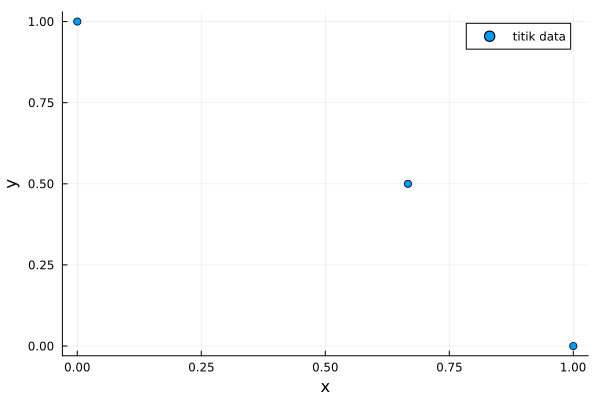

In [2]:
x = [0, 1, 2/3]
y = [1, 0, 0.5]

scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

In [3]:
V = [x[i]^j for i=1:length(x), j=0:length(x)-1]
V

3×3 Matrix{Float64}:
 1.0  0.0       0.0
 1.0  1.0       1.0
 1.0  0.666667  0.444444

In [4]:
a = V \ y
a

3-element Vector{Float64}:
  1.0
 -0.2500000000000001
 -0.7499999999999999

In [5]:
p = Polynomial(a)

Polynomial(1.0 - 0.2500000000000001*x - 0.7499999999999999*x^2)

In [6]:
xx = range(0, 1, length=100)
yy = p.(xx)
foreach(println, yy[1:length(y)])

1.0
0.997398224670952
0.9946434037343128


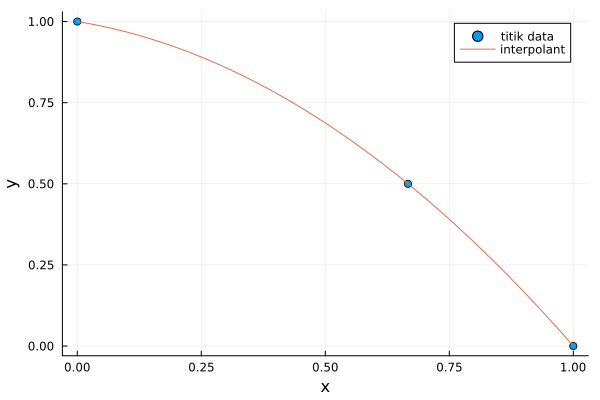

In [7]:
plot!(xx, yy, label="interpolant")

## Contoh 2
```{list-table} Populasi penduduk di Indonesia
:header-rows: 1
:name: populasi-indo

* - Tahun
  - Jumlah
* - 1980
  - 79.2
* - 2000
  - 223.6
* - 2010
  - 260.2
* - 2015
  - 278.2
```

### Plot data

In [8]:
tahun = [1980, 2000, 2010, 2015]
populasi = [79.2, 223.6, 260.2, 278.2]

t = tahun .- 1980
y = populasi;

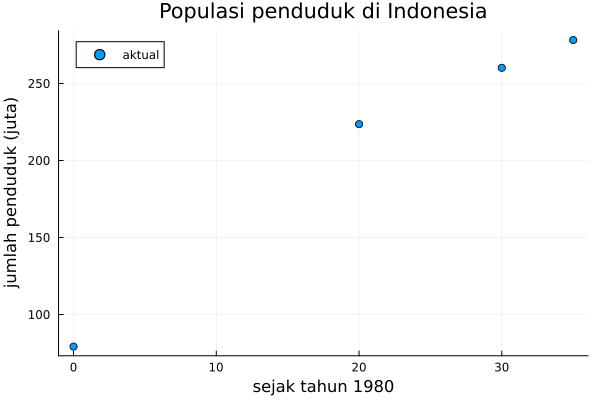

In [9]:
scatter(t, y, label="aktual",
    xlabel="sejak tahun 1980",
    ylabel="jumlah penduduk (juta)",
    title="Populasi penduduk di Indonesia"
)

In [10]:
V = [t[i]^j for i=1:4, j=0:3]

4×4 Matrix{Int64}:
 1   0     0      0
 1  20   400   8000
 1  30   900  27000
 1  35  1225  42875

In [11]:
c = V \ y

4-element Vector{Float64}:
 79.2
 11.55904761904761
 -0.2824761904761897
  0.003276190476190462

In [12]:
y - V*c

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0

In [13]:
p = Polynomial(c)
p(2000-1980)

223.6

In [14]:
tt = range(0, 35, length=100)
yy = p.(tt)
foreach(println, yy[1:4])

79.2
83.25137083174018
87.23299841938756
91.14575136117836


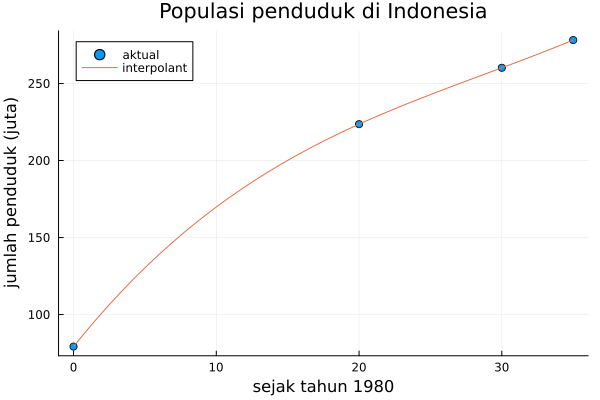

In [15]:
plot!(tt, yy, label="interpolant")